In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 운영 체제 정보를 확인하고, matplotlib을 사용하여 그래프 그릴 준비하기
import platform
import matplotlib.pyplot as plt

%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"

from matplotlib import font_manager, rc
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Sorry')

plt.rcParams['axes.unicode_minus'] = False

In [2]:
import tensorflow as tf

In [3]:
X = tf.range(10) #임의의 데이터 텐서
dataset = tf.data.Dataset.from_tensor_slices(X)
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [5]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [6]:
X_nested = {'a': ([1, 2, 3], [4, 5, 6]), 'b': [7, 8, 9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)
for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


In [8]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3).batch(7)
for item in dataset:
    print(item)

tf.Tensor([0 1 2 3 4 5 6], shape=(7,), dtype=int32)
tf.Tensor([7 8 9 0 1 2 3], shape=(7,), dtype=int32)
tf.Tensor([4 5 6 7 8 9 0], shape=(7,), dtype=int32)
tf.Tensor([1 2 3 4 5 6 7], shape=(7,), dtype=int32)
tf.Tensor([8 9], shape=(2,), dtype=int32)


In [9]:
dataset = dataset.map(lambda x: x * 2) # x는 하나의 배치.
for item in dataset:
    print(item)

tf.Tensor([ 0  2  4  6  8 10 12], shape=(7,), dtype=int32)
tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)
tf.Tensor([16 18], shape=(2,), dtype=int32)


In [10]:
dataset = dataset.filter(lambda x: tf.reduce_sum(x) > 50)
for item in dataset:
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)
tf.Tensor([ 2  4  6  8 10 12 14], shape=(7,), dtype=int32)


In [11]:
for item in dataset.take(2):
    print(item)

tf.Tensor([14 16 18  0  2  4  6], shape=(7,), dtype=int32)
tf.Tensor([ 8 10 12 14 16 18  0], shape=(7,), dtype=int32)


In [12]:
dataset = tf.data.Dataset.range(10).repeat(2)
dataset = dataset.shuffle(buffer_size=4, seed=42).batch(7)
for item in dataset:
    print(item)

tf.Tensor([1 4 2 3 5 0 6], shape=(7,), dtype=int64)
tf.Tensor([9 8 2 0 3 1 4], shape=(7,), dtype=int64)
tf.Tensor([5 7 9 6 7 8], shape=(6,), dtype=int64)


In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [14]:
# 데이터셋을 20개 파일로 분할하여 CSV 파일로 저장.

import numpy as np
from pathlib import Path

def save_to_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = Path() / "datasets" / "housing"
    housing_dir.mkdir(parents=True, exist_ok=True)
    filename_format = "my_{}_{:02d}.csv"

    filepaths = []
    m = len(data)
    chunks = np.array_split(np.arange(m), n_parts)
    for file_idx, row_indices in enumerate(chunks):
        part_csv = housing_dir / filename_format.format(name_prefix, file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv, "w") as f:
            if header is not None:
                f.write(header)
                f.write("\n")
            for row_idx in row_indices:
                f.write(",".join([repr(col) for col in data[row_idx]]))
                f.write("\n")
    return filepaths

train_data = np.c_[X_train, y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test, y_test]
header_cols = housing.feature_names + ["MedianHouseValue"]
header = ",".join(header_cols)

train_filepaths = save_to_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_csv_files(test_data, "test", header, n_parts=10)

In [15]:
print("".join(open(train_filepaths[0]).readlines()[:4]))

MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442
5.3275,5.0,6.490059642147117,0.9910536779324056,3464.0,3.4433399602385686,33.69,-117.39,1.687
3.1,29.0,7.5423728813559325,1.5915254237288134,1328.0,2.2508474576271187,38.44,-122.98,1.621



In [16]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

In [17]:
valid_filepaths

['datasets\\housing\\my_valid_00.csv',
 'datasets\\housing\\my_valid_01.csv',
 'datasets\\housing\\my_valid_02.csv',
 'datasets\\housing\\my_valid_03.csv',
 'datasets\\housing\\my_valid_04.csv',
 'datasets\\housing\\my_valid_05.csv',
 'datasets\\housing\\my_valid_06.csv',
 'datasets\\housing\\my_valid_07.csv',
 'datasets\\housing\\my_valid_08.csv',
 'datasets\\housing\\my_valid_09.csv']

In [18]:
test_filepaths

['datasets\\housing\\my_test_00.csv',
 'datasets\\housing\\my_test_01.csv',
 'datasets\\housing\\my_test_02.csv',
 'datasets\\housing\\my_test_03.csv',
 'datasets\\housing\\my_test_04.csv',
 'datasets\\housing\\my_test_05.csv',
 'datasets\\housing\\my_test_06.csv',
 'datasets\\housing\\my_test_07.csv',
 'datasets\\housing\\my_test_08.csv',
 'datasets\\housing\\my_test_09.csv']

In [19]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)

In [20]:
n_readers = 5
dataset = filepath_dataset.interleave(
    lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
    cycle_length=n_readers)

In [21]:
# 지금까지의 데이터셋 확인
for line in dataset.take(5):
    print(line)

tf.Tensor(b'4.2083,44.0,5.323204419889502,0.9171270718232044,846.0,2.3370165745856353,37.47,-122.2,2.782', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)
tf.Tensor(b'3.6875,44.0,4.524475524475524,0.993006993006993,457.0,3.195804195804196,34.04,-118.15,1.625', shape=(), dtype=string)
tf.Tensor(b'3.3456,37.0,4.514084507042254,0.9084507042253521,458.0,3.2253521126760565,36.67,-121.7,2.526', shape=(), dtype=string)
tf.Tensor(b'3.5214,15.0,3.0499445061043287,1.106548279689234,1447.0,1.6059933407325193,37.63,-122.43,1.442', shape=(), dtype=string)


In [22]:
# 각 특성의 평균 및 표준 편차 계산

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# 데이터 전처리 수행위한 사용자 정의 함수 생성
X_mean, X_std = scaler.mean_, scaler.scale_ 
n_inputs = 8

def parse_csv_line(line):
    defs = [0.] * n_inputs + [tf.constant([], dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    return tf.stack(fields[:-1]), tf.stack(fields[-1:])

def preprocess(line):
    x, y = parse_csv_line(line)
    return (x - X_mean) / X_std, y

In [23]:
preprocess(b'4.2083,44.0,5.323204419889502,0.9171270718232044,846.0,2.3370165745856353,37.47,-122.2,2.782')

(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204396, -0.39210168, -0.5277444 ,
        -0.26334172,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

In [26]:
def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                       n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                       batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1)

In [27]:
# 데이터셋에서 생성된 처음 몇 개의 배치를 출력.

example_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in example_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[-1.3957452  -0.04940685 -0.22830808  0.22648273  2.2593622   0.35200632
   0.9667386  -1.4121602 ]
 [ 2.7112627  -1.0778131   0.69413143 -0.14870553  0.51810503  0.3507294
  -0.82285154  0.80680597]
 [-0.13484643 -1.868895    0.01032507 -0.13787179 -0.12893449  0.03143518
   0.2687057   0.13212144]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.819]
 [3.674]
 [0.954]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[ 0.09031774  0.9789995   0.1327582  -0.13753782 -0.23388447  0.10211545
   0.97610843 -1.4121602 ]
 [ 0.05218809 -2.0271113   0.2940109  -0.02403445  0.16218767 -0.02844518
   1.4117942  -0.93737936]
 [-0.672276    0.02970133 -0.76922584 -0.15086786  0.4962024  -0.02741998
  -0.7853724   0.77182245]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[2.725]
 [1.205]
 [1.625]], shape=(3, 1), dtype=float32)



In [28]:
# tf.data.Dataset 클래스의 모든 메서드
for m in dir(tf.data.Dataset):
    if not (m.startswith("_") or m.endswith("_")):
        func = getattr(tf.data.Dataset, m)
        if hasattr(func, "__doc__"):
            print("● {:21s}{}".format(m + "()", func.__doc__.split("\n")[0]))

● apply()              Applies a transformation function to this dataset.
● as_numpy_iterator()  Returns an iterator which converts all elements of the dataset to numpy.
● batch()              Combines consecutive elements of this dataset into batches.
● bucket_by_sequence_length()A transformation that buckets elements in a `Dataset` by length.
● cache()              Caches the elements in this dataset.
● cardinality()        Returns the cardinality of the dataset, if known.
● choose_from_datasets()Creates a dataset that deterministically chooses elements from `datasets`.
● concatenate()        Creates a `Dataset` by concatenating the given dataset with this dataset.
● counter()            Creates a `Dataset` that counts from `start` in steps of size `step`.
● element_spec()       The type specification of an element of this dataset.
● enumerate()          Enumerates the elements of this dataset.
● filter()             Filters this dataset according to `predicate`.
● fingerprint()     

In [30]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [31]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4544 - val_loss: 24.7020
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.7013 - val_loss: 10.0446
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4666 - val_loss: 5.6787
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4835 - val_loss: 0.3864
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4208 - val_loss: 0.3939


In [33]:
test_mse = model.evaluate(test_set)
new_set = test_set.take(3) # 새로운 샘플이 3개 있다고 가정
y_pred = model.predict(new_set) # 넘파이 배열도 전달 가능

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.4084
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [35]:
# 훈련을 위한 옵티마이저 및 손실 함수 정의.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError

n_epochs = 5
for epoch in range(n_epochs):
    for X_batch, y_batch in train_set:
        # 경사 하강법 스텝 하나 수행.
        print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 1/5

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [36]:
# 훈련을 위한 옵티마이저 및 손실 함수 정의.
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()

n_epochs = 5
for epoch in range(n_epochs):
    for X_batch, y_batch in train_set:
        # 경사 하강법 스텝 하나 수행.
        print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 5/5

In [37]:
@tf.function
def train_one_epoch(model, optimizer, loss_fn, train_set):
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss =  tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.MeanSquaredError()
for epoch in range(n_epochs):
    print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
    train_one_epoch(model, optimizer, loss_fn, train_set)    

Epoch 5/5

In [42]:
with tf.io.TFRecordWriter('my_data.tfrecord') as f:
    f.write(b'This is the first record')
    f.write(b'And this is the second record')

In [43]:
filepaths = ['my_data.tfrecord']
dataset = tf.data.TFRecordDataset(filepaths)
for item in dataset:
    print(item)

tf.Tensor(b'This is the first record', shape=(), dtype=string)
tf.Tensor(b'And this is the second record', shape=(), dtype=string)


In [44]:
options = tf.io.TFRecordOptions(compression_type='GZIP')
with tf.io.TFRecordWriter('my_compressed.tfrecord', options) as f:
    f.write(b'Compress, compress, compress!')

In [47]:
dataset = tf.data.TFRecordDataset(['my_compressed.tfrecord'],
                                 compression_type='GZIP')

In [64]:
%%writefile person.proto
syntax = "proto3";
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Writing person.proto


In [65]:
!protoc person.proto --python_out=. --descriptor_set_out=person.desc --include_imports

In [66]:
%ls person*

 C 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: 36EC-ADD4

 C:\Users\niceq\Documents\DataScience\Hands_ML 디렉터리

2024-11-25  오후 05:31                92 person.desc
2024-11-25  오후 05:31               114 person.proto
2024-11-25  오후 05:31               986 person_pb2.py
               3개 파일               1,192 바이트
               0개 디렉터리  84,347,703,296 바이트 남음


In [67]:
from person_pb2 import Person  # 생성된 액세스 클래스 가져오기

person = Person(name="Al", id=123, email=["a@b.com"])  # Person 만들기
print(person)  # Person 출력

name: "Al"
id: 123
email: "a@b.com"



In [69]:
print('이름:', person.name) # 필드 읽기
person.name = 'Alice' # 필드 수정

print('첫번째 이메일:', person.email[0]) # 반복 필드는 배열처럼 참조 가능
person.email.append('c@d.com') # 이메일 주소 추가

serialized = person.SerializeToString() # 바이트 문자열로 객체를 직렬화
print('직렬화:', serialized)

person2 = Person() # 새로운 Person 객체 생성
print('문자열 파싱:', person2.ParseFromString(serialized)) # 길이가 27인 문자열 파싱

print('두 객체 동일한지 여부:', person == person2)

이름: Alice
첫번째 이메일: a@b.com
직렬화: b'\n\x05Alice\x10{\x1a\x07a@b.com\x1a\x07c@d.com\x1a\x07c@d.com'
문자열 파싱: 36
두 객체 동일한지 여부: True


In [70]:
person_tf = tf.io.decode_proto(
    bytes=serialized,
    message_type="Person",
    field_names=["name", "id", "email"],
    output_types=[tf.string, tf.int32, tf.string],
    descriptor_source="person.desc")

person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Alice'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123])>,
 <tf.Tensor: shape=(3,), dtype=string, numpy=array([b'a@b.com', b'c@d.com', b'c@d.com'], dtype=object)>]

In [72]:
%%writefile Example.proto
syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };

Writing Example.proto


In [74]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

person_example = Example(
    features=Features(
        feature={
            'name': Feature(bytes_list=BytesList(value=[b'Alice'])),
            'id': Feature(int64_list=Int64List(value=[123])),
            'emails': Feature(bytes_list=BytesList(value=[b'a@b.com',
                                                          b'c@d.com']))
        }))

In [80]:
with tf.io.TFRecordWriter('my_contacts.tfrecord') as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())

In [81]:
feature_description = {
    "name": tf.io.FixedLenFeature([], tf.string, default_value=""),
    "id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "emails": tf.io.VarLenFeature(tf.string),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

dataset = tf.data.TFRecordDataset(["my_contacts.tfrecord"]).map(parse)
for parsed_example in dataset:
    print(parsed_example)

{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0]
 [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)), 'id': <tf.Tensor: shape=(), dtype=int64, numpy=123>, 'name': <tf.Tensor: shape=(), dtype=string, numpy=b'Alice'>}
{'emails': SparseTensor(indices=tf.Tenso

In [82]:
tf.sparse.to_dense(parsed_example["emails"], default_value=b"")

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [83]:
parsed_example["emails"].values

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>

In [84]:
def parse(serialized_examples):
    return tf.io.parse_example(serialized_examples, feature_description)

dataset = tf.data.TFRecordDataset(['my_contacts.tfrecord']).batch(2).map(parse)
for parsed_examples in dataset:
    print(parsed_examples) # 한번에 두 개의 Example

{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123], dtype=int64)>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]
 [1 0]
 [1 1]], shape=(4, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com' b'a@b.com' b'c@d.com'], shape=(4,), dtype=string), dense_shape=tf.Tensor([2 2], shape=(2,), dtype=int64)), 'id': <tf.Tensor: shape=(2,), dtype=int64, numpy=array([123, 123], dtype=int64)>, 'name': <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'Alice', b'Alice'], dtype=object)>}
{'emails': SparseTensor(indices=tf.Tensor(
[[0 0]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=s

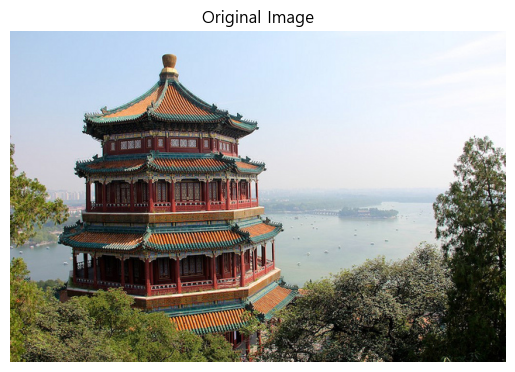

In [85]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [86]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()
with tf.io.TFRecordWriter("my_image.tfrecord") as f:
    f.write(serialized_example)

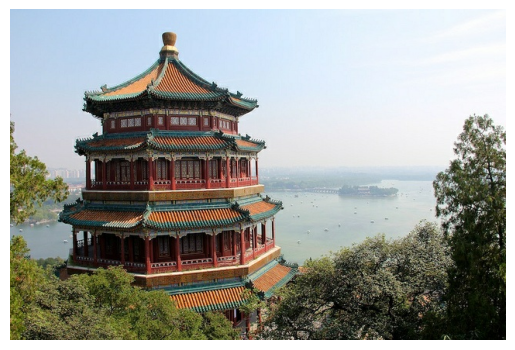

In [87]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }

def parse(serialized_example):
    example_with_image = tf.io.parse_single_example(serialized_example,
                                                    feature_description)
    return tf.io.decode_jpeg(example_with_image["image"].values[0])
    # 또는 tf.io.decode_image()를 대신 사용할 수 있다.

dataset = tf.data.TFRecordDataset("my_image.tfrecord").map(parse)
for image in dataset:
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [89]:
%%writefile SequnceExample.proto
syntax = "proto3";

message FeatureList { repeated Feature feature = 1; };
message FeatureLists { map<string, FeatureList> feature_list = 1; };
message SequenceExample {
    Features context = 1;
    FeatureLists feature_lists = 2;
};

Writing SequnceExample.proto


In [90]:
from tensorflow.train import FeatureList, FeatureLists, SequenceExample

context = Features(feature={
    "author_id": Feature(int64_list=Int64List(value=[123])),
    "title": Feature(bytes_list=BytesList(value=[b"A", b"desert", b"place", b"."])),
    "pub_date": Feature(int64_list=Int64List(value=[1623, 12, 25]))
})

content = [["When", "shall", "we", "three", "meet", "again", "?"],
           ["In", "thunder", ",", "lightning", ",", "or", "in", "rain", "?"]]
comments = [["When", "the", "hurlyburly", "'s", "done", "."],
            ["When", "the", "battle", "'s", "lost", "and", "won", "."]]

def words_to_feature(words):
    return Feature(bytes_list=BytesList(value=[word.encode("utf-8")
                                               for word in words]))

content_features = [words_to_feature(sentence) for sentence in content]
comments_features = [words_to_feature(comment) for comment in comments]

sequence_example = SequenceExample(
    context=context,
    feature_lists=FeatureLists(feature_list={
        "content": FeatureList(feature=content_features),
        "comments": FeatureList(feature=comments_features)
    }))

sequence_example

context {
  feature {
    key: "author_id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "pub_date"
    value {
      int64_list {
        value: 1623
        value: 12
        value: 25
      }
    }
  }
  feature {
    key: "title"
    value {
      bytes_list {
        value: "A"
        value: "desert"
        value: "place"
        value: "."
      }
    }
  }
}
feature_lists {
  feature_list {
    key: "comments"
    value {
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "hurlyburly"
          value: "\'s"
          value: "done"
          value: "."
        }
      }
      feature {
        bytes_list {
          value: "When"
          value: "the"
          value: "battle"
          value: "\'s"
          value: "lost"
          value: "and"
          value: "won"
          value: "."
        }
      }
    }
  }
  feature_list {
    key: "content"
    value {
      feature {
      

In [91]:
serialized_sequence_example = sequence_example.SerializeToString()

In [92]:
context_feature_descriptions = {
    "author_id": tf.io.FixedLenFeature([], tf.int64, default_value=0),
    "title": tf.io.VarLenFeature(tf.string),
    "pub_date": tf.io.FixedLenFeature([3], tf.int64, default_value=[0, 0, 0]),
}
sequence_feature_descriptions = {
    "content": tf.io.VarLenFeature(tf.string),
    "comments": tf.io.VarLenFeature(tf.string),
}

In [93]:
parsed_context, parsed_feature_lists = tf.io.parse_single_sequence_example(
    serialized_sequence_example, context_feature_descriptions,
    sequence_feature_descriptions)
parsed_content = tf.RaggedTensor.from_sparse(parsed_feature_lists["content"])

parsed_context

{'title': SparseTensor(indices=tf.Tensor(
 [[0]
  [1]
  [2]
  [3]], shape=(4, 1), dtype=int64), values=tf.Tensor([b'A' b'desert' b'place' b'.'], shape=(4,), dtype=string), dense_shape=tf.Tensor([4], shape=(1,), dtype=int64)),
 'author_id': <tf.Tensor: shape=(), dtype=int64, numpy=123>,
 'pub_date': <tf.Tensor: shape=(3,), dtype=int64, numpy=array([1623,   12,   25], dtype=int64)>}

In [94]:
parsed_context["title"].values

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'A', b'desert', b'place', b'.'], dtype=object)>

In [95]:
parsed_feature_lists

{'comments': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]
  [0 2]
  [0 3]
  [0 4]
  [0 5]
  [1 0]
  [1 1]
  [1 2]
  [1 3]
  [1 4]
  [1 5]
  [1 6]
  [1 7]], shape=(14, 2), dtype=int64), values=tf.Tensor(
 [b'When' b'the' b'hurlyburly' b"'s" b'done' b'.' b'When' b'the' b'battle'
  b"'s" b'lost' b'and' b'won' b'.'], shape=(14,), dtype=string), dense_shape=tf.Tensor([2 8], shape=(2,), dtype=int64)),
 'content': SparseTensor(indices=tf.Tensor(
 [[0 0]
  [0 1]
  [0 2]
  [0 3]
  [0 4]
  [0 5]
  [0 6]
  [1 0]
  [1 1]
  [1 2]
  [1 3]
  [1 4]
  [1 5]
  [1 6]
  [1 7]
  [1 8]], shape=(16, 2), dtype=int64), values=tf.Tensor(
 [b'When' b'shall' b'we' b'three' b'meet' b'again' b'?' b'In' b'thunder'
  b',' b'lightning' b',' b'or' b'in' b'rain' b'?'], shape=(16,), dtype=string), dense_shape=tf.Tensor([2 9], shape=(2,), dtype=int64))}

In [96]:
print(tf.RaggedTensor.from_sparse(parsed_feature_lists["content"]))

<tf.RaggedTensor [[b'When', b'shall', b'we', b'three', b'meet', b'again', b'?'],
 [b'In', b'thunder', b',', b'lightning', b',', b'or', b'in', b'rain', b'?']]>


In [4]:
tf.random.set_seed(42)

In [5]:
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
norm_layer.adapt(X_train) # 모든 특성의 평균과 분산 계산
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.8849 - val_loss: 0.8545
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - loss: 0.8064 - val_loss: 0.6427
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - loss: 0.6169 - val_loss: 0.6339
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - loss: 0.5930 - val_loss: 0.6327
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - loss: 0.5836 - val_loss: 0.6269


In [6]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss='mse', optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid), epochs=5)

Epoch 1/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.9607 - val_loss: 2.0285
Epoch 2/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.8387 - val_loss: 0.6522
Epoch 3/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.6592 - val_loss: 0.6957
Epoch 4/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - loss: 0.6293 - val_loss: 0.6728
Epoch 5/5
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.6137 - val_loss: 0.6596


In [11]:
final_model = tf.keras.Sequential([norm_layer, model])
X_new = X_test[:3] # 스케일을 조정하지 않은 새로운 샘플
y_pred = final_model(X_new) # 데이터를 전처리하고 예측 생성
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.8432447],
       [1.6963177],
       [2.3308494]], dtype=float32)>

In [12]:
# map()을 사용하여 norm_layer에 적용하는 데모용 데이터 세트 생성.
dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(5)
dataset = dataset.map(lambda X, y: (norm_layer(X), y))

# 첫 번째 배치 표시
list(dataset.take(1))

[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.19397889, -1.0778131 , -0.9433854 ,  0.01485314,  0.02073333,
          -0.57291627,  0.9292612 , -1.4221537 ],
         [ 0.7519831 , -1.868895  ,  0.40547806, -0.23327684,  1.8614649 ,
           0.20516537, -0.9165477 ,  1.0966716 ],
         [-0.41469118,  0.02970133,  0.8180882 ,  1.0567837 , -0.0878671 ,
          -0.2998328 ,  1.3087282 , -1.697027  ],
         [ 1.7188957 , -1.3151377 ,  0.32664376, -0.2195511 , -0.33792186,
          -0.11146631, -0.9821345 ,  0.94174504],
         [-0.9620722 , -1.2360295 , -0.05625783, -0.03124396,  1.7090592 ,
          -0.30256987, -0.80411196,  1.3265638 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

In [15]:
import numpy as np

class MyNormalization(tf.keras.layers.Layer):
    def adapt(self, X):
        self.mean_ = np.mean(X, axis=0, keepdims=True)
        self.std_ = np.std(X, axis=0, keepdims=True)

    def call(self, inputs):
        eps = tf.keras.backend.epsilon() # 0 나눗셈을 방지하기 위한 작은 값
        return (inputs - self.mean_) / (self.std_ + eps)

In [16]:
my_norm_layer = MyNormalization()
my_norm_layer.adapt(X_train)
X_train_scaled = my_norm_layer(X_train)

In [17]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]], dtype=int64)>

In [18]:
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories

<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]], dtype=int64)>

In [19]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

In [20]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

In [21]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode="count")
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 2.],
       [1., 0., 1.]], dtype=float32)>

In [22]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3+3)
onehot_layer(two_age_categories + [0, 3]) # 두 번째 특성에 3을 더함

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [23]:
# 각 기능을 개별적으로 원핫 인코딩하는 다른 방법.
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3,
                                                output_mode="one_hot")
tf.keras.layers.concatenate([onehot_layer(cat)
                             for cat in tf.transpose(two_age_categories)])

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [24]:
# tf.one_hot() 및 Flatten을 사용하여 이 작업을 수행하는 다른 방법.
tf.keras.layers.Flatten()(tf.one_hot(two_age_categories, depth=3))

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [26]:
cities = ['Aukland', 'Paris', 'Paris', 'San Francisco', 'Seoul', 'Tokyo']
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
str_lookup_layer([['Paris'], ['Auckland'], ['Paris'], ['Seoul'], ['Berlin']]) 

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[1],
       [0],
       [1],
       [3],
       [0]], dtype=int64)>

In [27]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode='one_hot')
str_lookup_layer.adapt(cities)
str_lookup_layer([['Paris'], ['Auckland'], ['Paris'], ['Seoul'], ['Berlin']]) 

<tf.Tensor: shape=(5, 6), dtype=int64, numpy=
array([[0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0]], dtype=int64)>

In [29]:
str_lookup_layer = tf.keras.layers.StringLookup(num_oov_indices=5)
str_lookup_layer.adapt(cities)
str_lookup_layer([['Paris'], ['Auckland'], ['Foo'], ['Bar'], ['Baz']])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [4],
       [4],
       [3],
       [4]], dtype=int64)>

In [30]:
# IntegerLookup 층을 사용한 예제
ids = [123, 456, 789]
int_lookup_layer = tf.keras.layers.IntegerLookup()
int_lookup_layer.adapt(ids)
int_lookup_layer([[123], [456], [123], [111]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[3],
       [2],
       [3],
       [0]], dtype=int64)>

In [31]:
hashing_layer = tf.keras.layers.Hashing(num_bins=10)
hashing_layer([["Paris"], ["Tokyo"], ["Auckland"], ["Montreal"]])

<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[0],
       [1],
       [9],
       [1]], dtype=int64)>

In [32]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.0115841 , -0.00569166],
       [ 0.0081756 , -0.0032283 ],
       [-0.0115841 , -0.00569166]], dtype=float32)>

In [33]:
tf.random.set_seed(42)
ocean_prox = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)
lookup_and_embed = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[], dtype=tf.string),  # WORKAROUND
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim=str_lookup_layer.vocabulary_size(),
                              output_dim=2)
])
lookup_and_embed(np.array(['<1H OCEAN', 'ISLAND', '<1H OCEAN']))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.01815503,  0.04914442],
       [-0.03868761,  0.02424189],
       [-0.01815503,  0.04914442]], dtype=float32)>

In [39]:
# 시드 설정 및 랜덤 데이터 생성
tf.random.set_seed(42)
np.random.seed(42)

ocean_prox = ['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND']

# 훈련 세트 로드
X_train_num = np.random.rand(10_000, 8).astype(np.float32)
X_train_cat = np.random.choice(ocean_prox, size=10_000)
y_train = np.random.rand(10_000, 1).astype(np.float32)

# 검증 세트 로드
X_valid_num = np.random.rand(2_000, 8).astype(np.float32)
X_valid_cat = np.random.choice(ocean_prox, size=2_000)
y_valid = np.random.rand(2_000, 1).astype(np.float32)

# tf.data.Dataset를 사용하여 데이터셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices(((X_train_num, X_train_cat), y_train))
valid_dataset = tf.data.Dataset.from_tensor_slices(((X_valid_num, X_valid_cat), y_valid))

# batch 및 shuffle 설정
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(32)
valid_dataset = valid_dataset.batch(32)

# lookup_and_embed 함수 정의
def lookup_and_embed(cat_input):
    lookup = tf.keras.layers.StringLookup(vocabulary=ocean_prox, output_mode='int')
    cat_indices = lookup(cat_input)
    embedding = tf.keras.layers.Embedding(input_dim=len(ocean_prox) + 1, output_dim=4)
    cat_embeddings = embedding(cat_indices)
    return cat_embeddings

# 모델 구성
num_input = tf.keras.layers.Input(shape=[8], name="num")
cat_input = tf.keras.layers.Input(shape=[], dtype=tf.string, name="cat")
cat_embeddings = lookup_and_embed(cat_input)

# 수치형 입력과 임베딩된 범주형 입력 합치기
encoded_inputs = tf.keras.layers.concatenate([num_input, cat_embeddings])
outputs = tf.keras.layers.Dense(1)(encoded_inputs)

model = tf.keras.models.Model(inputs=[num_input, cat_input], outputs=[outputs])
model.compile(loss="mse", optimizer="sgd")

# 모델 훈련
history = model.fit(train_dataset, epochs=5, validation_data=valid_dataset)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1499 - val_loss: 0.1181
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.1092 - val_loss: 0.0985
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 0.0955 - val_loss: 0.0908
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - loss: 0.0887 - val_loss: 0.0872
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.0848 - val_loss: 0.0855


In [40]:
train_data = ["To be", "!(To be)", "That's the question", "Be, be, be."]
text_vec_layer = tf.keras.layers.TextVectorization()
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]], dtype=int64)>

In [41]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode='tf_idf')
text_vec_layer.adapt(train_data)
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[0.96725637, 0.6931472 , 0.        , 0.        , 0.        ,
        0.        ],
       [0.96725637, 1.3862944 , 0.        , 0.        , 0.        ,
        1.0986123 ]], dtype=float32)>

In [43]:
!pip install --upgrade tensorflow_hub

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------- -------------------------- 0.6/1.7 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------  1.7/1.7 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 18.2 MB/s eta 0:00:00


DEPRECATION: Loading egg at c:\users\niceq\anaconda3\lib\site-packages\huggingface_hub-0.24.7-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import tensorflow_hub as hub
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2")
sentence_embeddings = hub_layer(tf.constant(["To be", "Not to be"]))
sentence_embeddings.numpy().round(2)

array([[-0.25,  0.28,  0.01,  0.1 ,  0.14,  0.16,  0.25,  0.02,  0.07,
         0.13, -0.19,  0.06, -0.04, -0.07,  0.  , -0.08, -0.14, -0.16,
         0.02, -0.24,  0.16, -0.16, -0.03,  0.03, -0.14,  0.03, -0.09,
        -0.04, -0.14, -0.19,  0.07,  0.15,  0.18, -0.23, -0.07, -0.08,
         0.01, -0.01,  0.09,  0.14, -0.03,  0.03,  0.08,  0.1 , -0.01,
        -0.03, -0.07, -0.1 ,  0.05,  0.31],
       [-0.2 ,  0.2 , -0.08,  0.02,  0.19,  0.05,  0.22, -0.09,  0.02,
         0.19, -0.02, -0.14, -0.2 , -0.04,  0.01, -0.07, -0.22, -0.1 ,
         0.16, -0.44,  0.31, -0.1 ,  0.23,  0.15, -0.05,  0.15, -0.13,
        -0.04, -0.08, -0.16, -0.1 ,  0.13,  0.13, -0.18, -0.04,  0.03,
        -0.1 , -0.07,  0.07,  0.03, -0.08,  0.02,  0.05,  0.07, -0.14,
        -0.1 , -0.18, -0.13, -0.04,  0.15]], dtype=float32)

In [46]:
from sklearn.datasets import load_sample_images

images = load_sample_images()["images"]
crop_image_layer = tf.keras.layers.CenterCrop(height=100, width=100)
cropped_images = crop_image_layer(images)

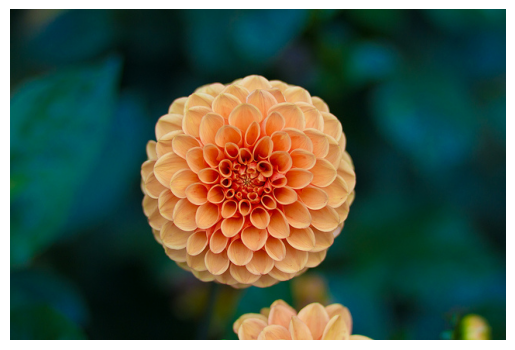

In [47]:
plt.imshow(images[1])
plt.axis("off")
plt.show()

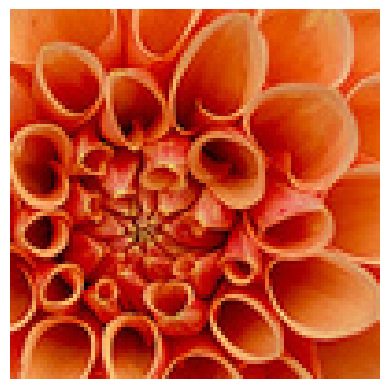

In [49]:
plt.imshow(cropped_images[1] / 255)
plt.axis("off")
plt.show()

In [6]:
pip install tensorflow_datasets

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/5.3 MB ? eta -:--:--
   ----- ---------------------------------- 0.7/5.3 MB 22.5 MB/s eta 0:00:01
   ------------- -------------------------- 1.8/5.3 MB 22.6 MB/s eta 0:00:01
   -------------------------- ------------- 3.5/5.3 MB 27.7 MB/s eta 0:00:01
   -------------------------------- ------- 4.3/5.3 MB 27.6 MB/s eta 0:00:01
   -------------------------------- ------- 4.4/5.3 MB 23.3 MB/s eta 0:00:01
   --------------------------------- ------ 4.5/5.3 MB 17.9 MB/s eta 0:00:01
   ----------------------------------- ---- 4.8/5.3 MB 15.2 MB/s eta 0:00:01
   -------------------------------------- - 5.1/5.3 MB 14.3 MB/s eta 0:00:01
   ---------------------------------------  5.3/5.3 MB 14.1 MB/s eta 0:00:01
   ---------------------------------------- 5.3/5.3 MB 13.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/164.9 kB ? 

DEPRECATION: Loading egg at c:\users\niceq\anaconda3\lib\site-packages\huggingface_hub-0.24.7-py3.8.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.30.0 requires protobuf<5,>=3.20, but you have protobuf 5.28.3 which is incompatible.

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import tensorflow_datasets as tfds

dataset = tfds.load(name='mnist')
mnist_train, mnist_test = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\niceq\tensorflow_datasets\mnist\incomplete.UEUG01_3.0.1\mnist-train.tfrecord*...:   0%|    …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\niceq\tensorflow_datasets\mnist\incomplete.UEUG01_3.0.1\mnist-test.tfrecord*...:   0%|     …

Dataset mnist downloaded and prepared to C:\Users\niceq\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [8]:
for batch in mnist_train.shuffle(10_000, seed=42).batch(32).prefetch(1):
    images = batch['image']
    labels = batch['label']
    # 모델 훈련 준비 예시

In [9]:
mnist_train = mnist_train.shuffle(10_000, seed=42).batch(32)
mnist_train = mnist_train.map(lambda items: (items["image"], items["label"]))
mnist_train = mnist_train.prefetch(1)

In [11]:
train_set, valid_set, test_set = tfds.load(
    name='mnist',
    split=['train[:90%]', 'train[90%:]', 'test'],
    as_supervised = True
)
train_set = train_set.shuffle(buffer_size=10_000, seed=42).batch(32).prefetch(1)
valid_set = valid_set.batch(32).cache()
test_set = test_set.batch(32).cache()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam',
              metrics=['accuracy'])
history=model.fit(train_set, validation_data=valid_set, epochs=5)
test_loss, test_accuracy = model.evaluate(test_set)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7637 - loss: 18.5304 - val_accuracy: 0.8692 - val_loss: 6.4692
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8776 - loss: 5.9043 - val_accuracy: 0.8882 - val_loss: 5.3261
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.8844 - loss: 5.0832 - val_accuracy: 0.8763 - val_loss: 5.5331
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.8872 - loss: 4.9462 - val_accuracy: 0.8847 - val_loss: 5.7179
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 942us/step - accuracy: 0.8879 - loss: 4.7953 - val_accuracy: 0.8872 - val_loss: 5.6126
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8965 - loss: 4.9803
